In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
#reading DataSet

In [2]:
data = pd.read_csv(r'C:\Users\Dell\Downloads\train.csv',sep=",")

In [3]:
data1 = data[['Survived','Pclass','Age','SibSp','Parch','Fare']]

In [4]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [6]:
data2=data1.dropna(axis=0).reset_index(drop=True)

In [7]:
#agglomerative

In [8]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data2, 5)
agglomerative = pd.DataFrame(clust_labels1)
data2.insert((data2.shape[1]),'agglomerative',agglomerative)

In [9]:
data2.groupby('agglomerative').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
agglomerative,,,,,,
0,0.334507,2.514085,28.484595,0.448944,0.394366,15.877105
1,0.733333,1.000000,32.430667,0.600000,0.866667,131.183883
2,0.653061,1.234694,35.632653,0.795918,0.377551,68.176576
3,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
4,0.733333,1.000000,30.333333,1.000000,1.333333,239.991940


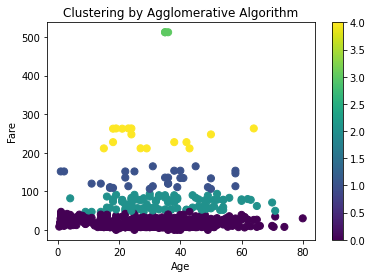

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['Age'],data2['Fare'],c=agglomerative[0],s=50)
ax.set_title('Clustering by Agglomerative Algorithm')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.colorbar(scatter)

In [11]:
#kmeans

In [12]:
del data2
data2=data1.dropna(axis=0).reset_index(drop=True)

In [13]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data2, 5)
kmeans = pd.DataFrame(clust_labels)
data2.insert((data2.shape[1]),'kmeans',kmeans)


In [14]:
data2.groupby('kmeans').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
kmeans,,,,,,
0,0.637255,1.274510,35.725490,0.843137,0.450980,67.193180
1,0.733333,1.000000,30.333333,1.000000,1.333333,239.991940
2,0.335106,2.515957,28.417110,0.437943,0.381206,15.684034
3,0.733333,1.000000,32.430667,0.600000,0.866667,131.183883
4,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200


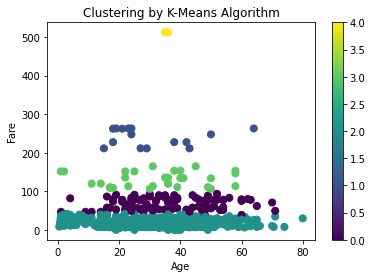

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['Age'],data2['Fare'],c=kmeans[0],s=50)
ax.set_title('Clustering by K-Means Algorithm')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.colorbar(scatter)

In [ ]:
#Hierarchical Clustering

In [16]:
del data2
data2=data1.dropna(axis=0).reset_index(drop=True)

In [17]:
merg = linkage(data2[0:10], method="ward")
print(merg)

[[  2.           7.           3.9106507    2.        ]
 [  6.           9.           5.30477379   2.        ]
 [  0.          10.           6.15841156   3.        ]
 [  4.          12.          12.34003146   4.        ]
 [  8.          11.          18.2324326    3.        ]
 [  1.           3.          18.42911823   2.        ]
 [  5.          15.          23.5213758    3.        ]
 [ 13.          14.          46.58343356   7.        ]
 [ 16.          17.         102.82744677  10.        ]]


Text(0, 0.5, 'euclidean distance')

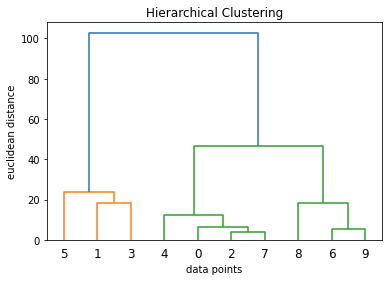

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
dendrogram(merg, leaf_rotation = 0)
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('data points')
ax.set_ylabel('euclidean distance')